In [1]:
import tensorflow as tf

In [2]:
from sklearn.metrics import mean_absolute_error

In [3]:
from tqdm import notebook

In [4]:
from tensorflow import keras

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.utils import shuffle

In [8]:
X = np.load('C:/Users/Димантре/Desktop/Jupiter/тест на CV/idchess_zadanie/xtrain.npy')

Тренировочная выборка - это 15137 чёрно-белых фотографий 256х256, которые хранятся в четырёхмерном тензоре

In [9]:
Y = np.load('C:/Users/Димантре/Desktop/Jupiter/тест на CV/idchess_zadanie/ytrain.npy')

Перемешаем данные:

In [10]:
X, Y = shuffle(X, Y, random_state=12345)

Возьмём часть данных:

In [11]:
num = 500

In [12]:
xtrain = X[:num]

In [13]:
ytrain = Y[:num]

Создадим валидационную выборку:

In [14]:
xvalid = X[num+1:num + 101]

In [15]:
yvalid = Y[num+1:num+101]

In [16]:
xvalid.shape

(100, 256, 256, 1)

In [17]:
yvalid.shape

(100, 8)

Подгрузим тестовые данные:

In [18]:
xtest = np.load('C:/Users/Димантре/Desktop/Jupiter/тест на CV/idchess_zadanie/xtest.npy')

In [19]:
xtest.shape

(5, 256, 256, 1)

Взглянем на кратинку из тренировочной выборки:

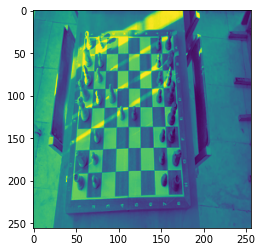

In [20]:
dig = xtrain[61]
plt.imshow(dig)

Отмасштабируем значения так, чтобы все значения оказались в интервале [0,1]:

In [21]:
#xtrain = xtrain.reshape((9000, 256, 256, 1))
xtrain = xtrain.astype('float32') / 255
#xvalid = xvalid.reshape((500, 256, 256, 1))
xvalid = xvalid.astype('float32') / 255

In [22]:
#xtest = xtest.reshape((5, 256, 256, 1))
xtest = xtest.astype('float32') / 255

Размеры тензоров:

In [23]:
xtrain.shape

(500, 256, 256, 1)

In [24]:
xvalid.shape

(100, 256, 256, 1)

Построим свёрточную нейронную сеть:

In [25]:
from keras import models
from keras import layers

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',
input_shape=(256, 256, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(8, activation='tanh'))

In [27]:
model.compile(optimizer='adam',
loss='mse',
metrics=['mae'])

Запускаем обучение сети:

In [28]:
model.fit(xtrain, ytrain, epochs=500, batch_size=1000)

Epoch 1/500
1/1 [==============================] - 76s 76s/step - loss: 0.3478 - mae: 0.4959
Epoch 2/500
1/1 [==============================] - 63s 63s/step - loss: 0.0760 - mae: 0.2241
Epoch 3/500
1/1 [==============================] - 68s 68s/step - loss: 0.0738 - mae: 0.2156
Epoch 4/500
1/1 [==============================] - 73s 73s/step - loss: 0.0382 - mae: 0.1551
Epoch 5/500
1/1 [==============================] - 71s 71s/step - loss: 0.0213 - mae: 0.1186
Epoch 6/500
1/1 [==============================] - 77s 77s/step - loss: 0.0116 - mae: 0.0850
Epoch 7/500
1/1 [==============================] - 71s 71s/step - loss: 0.0135 - mae: 0.0888
Epoch 8/500
1/1 [==============================] - 52s 52s/step - loss: 0.0146 - mae: 0.0940
Epoch 9/500
1/1 [==============================] - 65s 65s/step - loss: 0.0114 - mae: 0.0834
Epoch 10/500
1/1 [==============================] - 69s 69s/step - loss: 0.0105 - mae: 0.0786
Epoch 11/500
1/1 [==============================] - 75s 75s/step - lo

Видим уменьшение функции потерь и метрику МАЕ. Получаем предсказания для валидационной выборки:

In [29]:
predictions = model.predict(xvalid)

In [31]:
yvalid[5:10]

array([[0.25182292, 0.02739832, 0.20529515, 1.0027912 , 0.88376737,
        0.9755014 , 0.7809896 , 0.03312622],
       [0.29140624, 0.05927327, 0.2108507 , 0.86377287, 0.8414062 ,
        0.8901499 , 0.7518229 , 0.09495985],
       [0.25013083, 0.04565354, 0.20714699, 0.92839473, 0.7627025 ,
        0.91035867, 0.71918404, 0.04262321],
       [0.26015624, 0.02358669, 0.2032118 , 0.99333066, 0.8872396 ,
        0.9863485 , 0.78862846, 0.03677521],
       [0.29765624, 0.15281633, 0.24487847, 0.880893  , 0.7671007 ,
        0.8646807 , 0.69626737, 0.14765789]], dtype=float32)

Посчитаем MAE валидационной и предсказанной выборки:

In [32]:
mae = mean_absolute_error(yvalid, predictions)
mae

0.01238342

Из-за большого количество батчей немного переобучили сеть.

Получим предсказания для тестовой выборки:

In [33]:
predictions_test = model.predict(xtest)

In [34]:
predictions_test

array([[0.30488038, 0.12626661, 0.20329094, 0.9800465 , 0.8266008 ,
        0.97113323, 0.76653326, 0.12841272],
       [0.28961912, 0.13352095, 0.17883201, 0.85460395, 0.7501525 ,
        0.88893044, 0.7124492 , 0.14926837],
       [0.38156793, 0.07572816, 0.3053013 , 0.91395104, 0.90414786,
        0.9307071 , 0.839996  , 0.07541664],
       [0.3650525 , 0.12814945, 0.29272667, 0.94457734, 0.89683306,
        0.94509304, 0.8246232 , 0.16690744],
       [0.3035801 , 0.05533533, 0.24865101, 0.94232345, 0.8375694 ,
        0.9606847 , 0.78941846, 0.0706872 ]], dtype=float32)